In [ ]:
! python -m pip uninstall matplotlib
! pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

In [1]:
#Import dataset from Kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fedesoriano/heart-failure-prediction
! unzip heart-failure-prediction.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open heart-failure-prediction.zip, heart-failure-prediction.zip.zip or heart-failure-prediction.zip.ZIP.


In [4]:
! mkdir ~/.kaggle
! echo '{"username":"seyeonsim","key":"0009e41ecffa6912216da406a77da98a"}' > kaggle.json
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fedesoriano/heart-failure-prediction
! unzip heart-failure-prediction.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-failure-prediction.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

sns.set_theme(palette = "mako")
data = pd.read_csv('heart.csv')
data.to_csv("data-input.csv")
df = data.copy()

In [6]:
#check null values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# save data
df.to_csv("data.csv")

Data Preparation

In [8]:
from pandas.core.arrays import categorical 

# categorical/binary that needed to be coded

# I grabbed the code from heartdisease_datascience_tutorial by Joweria's Tutorial
categorical_data_columns = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

codes = {}  # Create a dictionary to store the codes of the conversion
for i in df:  # For each variable in the data frame 
  if i in categorical_data_columns:  # For each variable that was classified as categorical
    specific_codes = {}  # Create a dictionary for that variable's code conversion 
    df[i] = df[i].astype("category")  # Convert that variable from 'object' datatype to category
    df[i] = df[i].cat.codes  # Create codes for the categories and replace in the dataset 
    coded = df[i].unique()  # Get the unique values (the codes) from the variable
    count = 0  # Count initialized. Later used for accessing specific indexes
    for j in data[i].unique():  # For each unique value
      specific_codes[j] = coded[count]  # Create an item in the dictionary with the value, and tell it which code correlates
      count += 1  # Count incremented
    codes[i] = specific_codes  # Create a new item in the overall dictionary with the dictionary created for this specific variable's codes


# View our created dictionary:
for i in codes:
  print("{} -".format(i))
  for j in codes[i]:
    print("{}: {}".format(j, codes[i][j]))
  print()

# These are the variables I classified as categorical/binary
categorical_data_columns = ["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]
numerical_data_columns = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]


Sex -
M: 1
F: 0

ChestPainType -
ATA: 1
NAP: 2
ASY: 0
TA: 3

RestingECG -
Normal: 1
ST: 2
LVH: 0

ExerciseAngina -
N: 0
Y: 1

ST_Slope -
Up: 2
Flat: 1
Down: 0



In [9]:
#save cleaned dataset
df.to_csv("data-cleaned.csv")

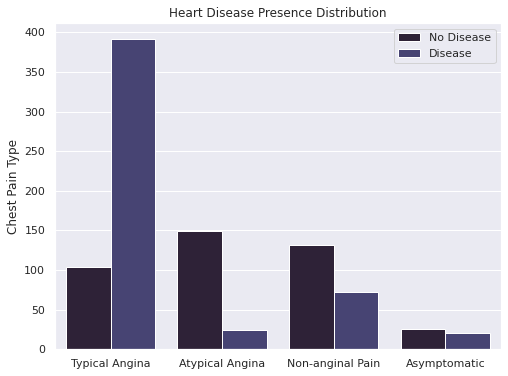

In [10]:
df2 = df.copy()
# plot histogram of Heart disease by different chest pain type
plt.figure(figsize =(8, 6))
f = sns.countplot(x='ChestPainType', data=df2, hue='HeartDisease')
f.set_title("Heart Disease Presence Distribution")
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.ylabel("Chest Pain Type")
plt.xlabel("")
plt.legend(['No Disease', 'Disease'])

(12.5, -0.5)

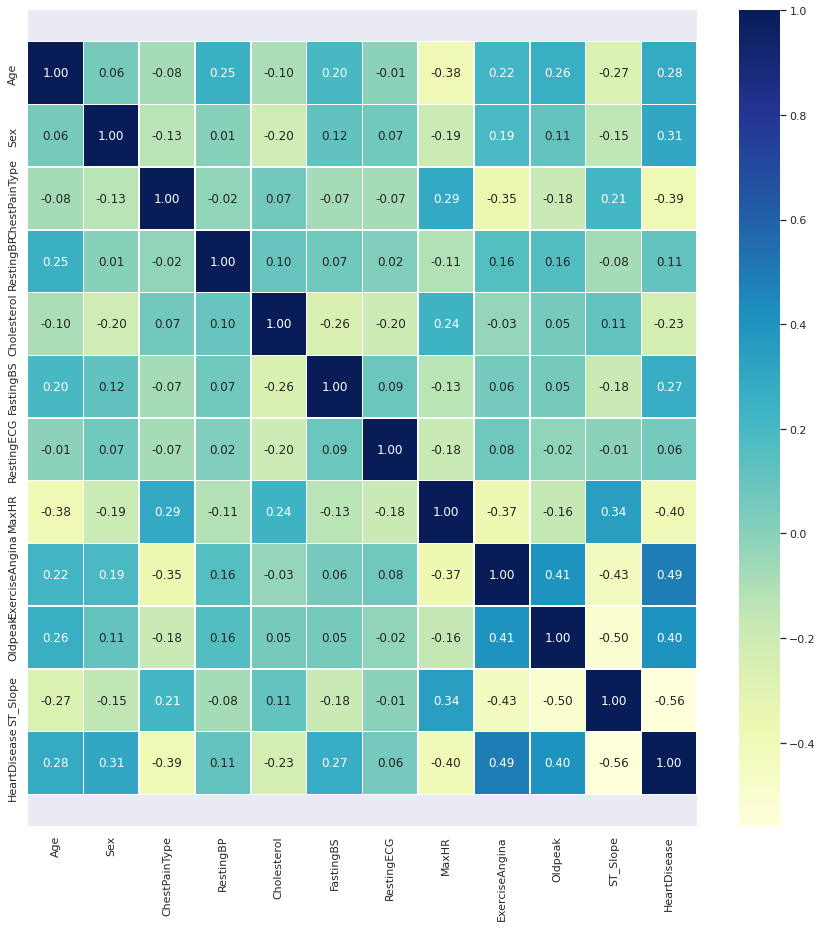

In [11]:
#plot correlation heatmap
corr = df2.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

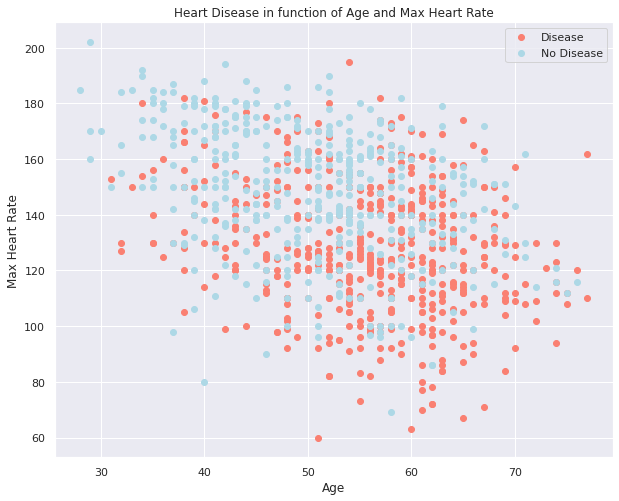

In [12]:
# plot scatterplot 

plt.figure(figsize=(10, 8))
plt.scatter(df2.Age[df2.HeartDisease==1],
            df2.MaxHR[df2.HeartDisease==1],
            c="salmon")
plt.scatter(df2.Age[df2.HeartDisease==0],
            df2.MaxHR[df2.HeartDisease==0],
            c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [15]:
# numerical column
numerical_data= df2[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","HeartDisease"]]


Split the data into training and test sets

In [16]:
#divide the dataset into train dataset and test dataset
train_dataset = numerical_data.sample(frac=0.80, random_state=0)
test_dataset = numerical_data.drop(train_dataset.index)

In [17]:
#inputs
train_features = train_dataset.copy()
test_features = test_dataset.copy()
#output
train_labels = train_features.pop('HeartDisease')
test_labels = test_features.pop('HeartDisease')


In [19]:
#append all numerical dataset into a single vector
train_features = np.array(train_features)

In [20]:
import tensorflow as tf
import numpy as np
#make model
print("--Make model--")
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.LeakyReLU(alpha=0.1),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
#fit model
print("--Fit model--")
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_features, train_labels, batch_size=128, epochs=30, verbose = 2)

--Make model--
--Fit model--
Epoch 1/30
6/6 - 1s - loss: 5.1088 - accuracy: 0.5668 - 1s/epoch - 172ms/step
Epoch 2/30
6/6 - 0s - loss: 4.6365 - accuracy: 0.6035 - 37ms/epoch - 6ms/step
Epoch 3/30
6/6 - 0s - loss: 4.2767 - accuracy: 0.5940 - 34ms/epoch - 6ms/step
Epoch 4/30
6/6 - 0s - loss: 4.2199 - accuracy: 0.6172 - 33ms/epoch - 6ms/step
Epoch 5/30
6/6 - 0s - loss: 3.9320 - accuracy: 0.6131 - 34ms/epoch - 6ms/step
Epoch 6/30
6/6 - 0s - loss: 3.6924 - accuracy: 0.6417 - 33ms/epoch - 6ms/step
Epoch 7/30
6/6 - 0s - loss: 3.3556 - accuracy: 0.6526 - 37ms/epoch - 6ms/step
Epoch 8/30
6/6 - 0s - loss: 2.9303 - accuracy: 0.6703 - 36ms/epoch - 6ms/step
Epoch 9/30
6/6 - 0s - loss: 2.7572 - accuracy: 0.6594 - 33ms/epoch - 5ms/step
Epoch 10/30
6/6 - 0s - loss: 2.8245 - accuracy: 0.6526 - 34ms/epoch - 6ms/step
Epoch 11/30
6/6 - 0s - loss: 2.6270 - accuracy: 0.6499 - 32ms/epoch - 5ms/step
Epoch 12/30
6/6 - 0s - loss: 2.5939 - accuracy: 0.6540 - 36ms/epoch - 6ms/step
Epoch 13/30
6/6 - 0s - loss: 2.5

In [21]:
print("--Evaluate model--")
model_loss1, model_acc1 = model.evaluate(train_features,  train_labels, verbose=2)
model_loss2, model_acc2 = model.evaluate(test_features,  test_labels, verbose=2)
print(f"Train / Test Accuracy: {model_acc1*100:.1f}% / {model_acc2*100:.1f}%")

--Evaluate model--
23/23 - 1s - loss: 0.5354 - accuracy: 0.7820 - 578ms/epoch - 25ms/step
6/6 - 0s - loss: 0.6368 - accuracy: 0.7337 - 336ms/epoch - 56ms/step
Train / Test Accuracy: 78.2% / 73.4%


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_features)
bin_predictions = tf.round(predictions).numpy().flatten()

6/6 [==============================] - 0s 2ms/step


In [25]:
cnf_matrix = confusion_matrix(test_labels, bin_predictions)

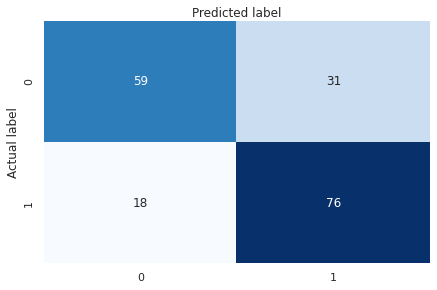

In [27]:
#main stage3 visualization
#confusion matrix
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Blues",fmt="d",cbar=False)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');